In [17]:
from matplotlib import pyplot as plt
import numpy as np
import collections

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [18]:
# Creat Custom dataset. Idea supplied by Dr. Silva
class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        self.data = torch.from_numpy(data).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

In [19]:
from sklearn.preprocessing import LabelEncoder

numpy_data = np.load('train_data.npy')
numpy_target = np.load('train_labels.npy')
numpy_data = numpy_data/255
# numpy_data = numpy_data.transpose((0, 3, 2, 1))
le = LabelEncoder()
le.fit(numpy_target)
target = le.transform(numpy_target)
target = target+1

In [34]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(numpy_data, target, test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1475, 100, 100, 3), (369, 100, 100, 3), (1475,), (369,))

In [20]:
class_names = ['A','B','C','D','E',
               'F','G','H','I']

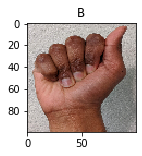

In [21]:
img = numpy_data[6,:,:,:]
label = target[6]
plt.figure(figsize=(2,2))
plt.imshow(img)
plt.title(class_names[label])
plt.show()

In [35]:
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils

dataset_train = MyDataset(X_train, y_train,transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))]))
cifar10 = DataLoader(dataset_train)
                          

In [38]:
dataset_test = MyDataset(X_test, y_test,transform=transforms.Compose([
                              transforms.ToTensor(),
                              transforms.Normalize((0.4915, 0.4823, 0.4468),
                                                   (0.2470, 0.2435, 0.2616))]))
cifar10_val = DataLoader(dataset_test)

In [54]:
print(cifar10)

In [39]:
label_map = {0: 0, 2: 1}
class_names = ['A', 'C']
cifar2 = [(img, label_map[label]) for img, label in cifar10 if label in [0, 2]]
cifar2_val = [(img, label_map[label]) for img, label in cifar10_val if label in [0, 2]]

TypeError: pic should be PIL Image or ndarray. Got <class 'torch.Tensor'>

In [41]:
connected_model = nn.Sequential(
    nn.Linear(3072,1024),nn.Tanh(),
    nn.Linear(1024,512), nn.Tanh(),
    nn.Linear(512,128), nn.Tanh(),
    nn.Linear(128,2))

In [42]:
numel_list = [p.numel() for p in connected_model.parameters() if p.requires_grad==True]
sum(numel_list), numel_list

(3737474, [3145728, 1024, 524288, 512, 65536, 128, 256, 2])

In [43]:
first_model = nn.Sequential(
    nn.Linear(3072,512),nn.Tanh(),
    nn.Linear(512,2), nn.LogSoftmax(dim=1))

In [44]:
numel_list = [p.numel() for p in first_model.parameters()]
sum(numel_list), numel_list

(1574402, [1572864, 512, 1024, 2])

In [45]:
linear = nn.Linear(3072, 1024)

linear.weight.shape, linear.bias.shape

(torch.Size([1024, 3072]), torch.Size([1024]))

In [46]:
conv = nn.Conv2d(3, 16, kernel_size = 3, padding = 1)
conv

Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))

In [47]:
conv.weight.shape, conv.bias.shape

(torch.Size([16, 3, 3, 3]), torch.Size([16]))

In [51]:
img,_ = cifar10[0]
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

TypeError: 'DataLoader' object is not subscriptable

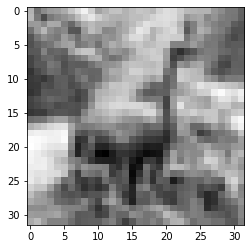

In [16]:
plt.imshow(img.mean(0), cmap='gray');

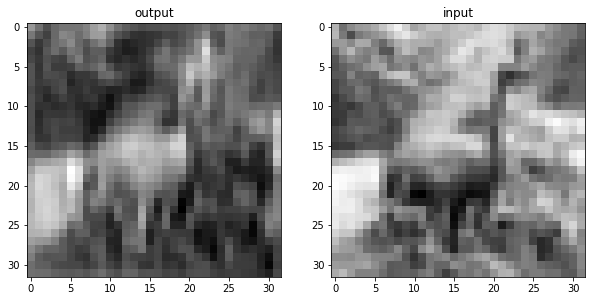

In [17]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

In [18]:
conv = nn.Conv2d(3, 1, kernel_size = 3, padding = 1)
output = conv(img.unsqueeze(0))
img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 1, 32, 32]))

In [19]:
with torch.no_grad():
    conv.bias.zero_()
    
with torch.no_grad():
    conv.weight.fill_(1.0 / 9.0)

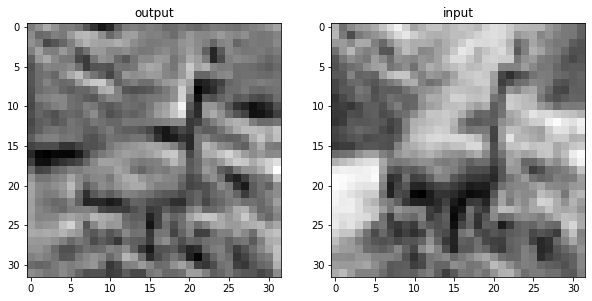

In [20]:
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

In [21]:
conv = nn.Conv2d(3, 1, kernel_size=3, padding=1)

with torch.no_grad():
    conv.weight[:] = torch.tensor([[-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0],
                                   [-1.0, 0.0, 1.0]])
    conv.bias.zero_()

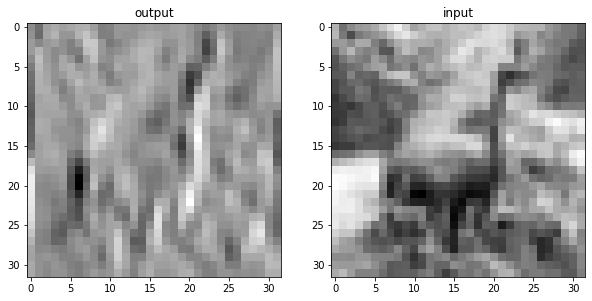

In [22]:
output = conv(img.unsqueeze(0))
plt.figure(figsize=(10, 4.8))
ax1 = plt.subplot(1, 2, 1)
plt.title('output')
plt.imshow(output[0, 0].detach(), cmap='gray')
plt.subplot(1, 2, 2, sharex=ax1, sharey=ax1)
plt.imshow(img.mean(0), cmap='gray')
plt.title('input')
plt.show()

In [23]:
pool = nn.MaxPool2d(2)
output = pool(img.unsqueeze(0))

img.unsqueeze(0).shape, output.shape

(torch.Size([1, 3, 32, 32]), torch.Size([1, 3, 16, 16]))

In [24]:
model = nn.Sequential(
    nn.Conv2d(3,16,kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    nn.Conv2d(16, 8, kernel_size=3, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2),
    ###
    nn.Linear(8*8*8, 32),
    nn.Tanh(),
    nn.Linear(32,2))

In [25]:
numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

In [26]:
model(img.unsqueeze(0))

RuntimeError: size mismatch, m1: [64 x 8], m2: [512 x 32] at C:\w\1\s\tmp_conda_3.7_075911\conda\conda-bld\pytorch_1579075223148\work\aten\src\TH/generic/THTensorMath.cpp:136

What's missing there is the reshaping step from a 8-channel 8x8 image to a 512-element, 1D vector.

In [27]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.act1 = nn.Tanh()
        self.pool1 = nn.MaxPool2d(2)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.act2 = nn.Tanh()
        self.pool2 = nn.MaxPool2d(2)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.act3 = nn.Tanh()
        self.fc2 = nn.Linear(32, 2)

    def forward(self, x):
        out = self.pool1(self.act1(self.conv1(x)))
        out = self.pool2(self.act2(self.conv2(out)))
        out = out.view(-1, 8 * 8 * 8) #reshape
        out = self.act3(self.fc1(out))
        out = self.fc2(out)
        return out

In [28]:
model = Net()

numel_list = [p.numel() for p in model.parameters()]
sum(numel_list), numel_list

(18090, [432, 16, 1152, 8, 16384, 32, 64, 2])

### Functional API

PyTorch has counterparts of *functional* every nn module. By "functional" here we mean "having no internal state", or, in other words, "whose output value is solely and fully determined by the value input arguments".

In [29]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(16, 8, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(8 * 8 * 8, 32)
        self.fc2 = nn.Linear(32, 2)
        
    def forward(self, x):
        out = F.max_pool2d(torch.tanh(self.conv1(x)), 2)
        out = F.max_pool2d(torch.tanh(self.conv2(out)), 2)
        out = out.view(-1, 8 * 8 * 8)
        out = torch.tanh(self.fc1(out))
        out = self.fc2(out)
        return out

In [30]:
model = Net()
model(img.unsqueeze(0))

tensor([[-0.1270, -0.1463]], grad_fn=<AddmmBackward>)

In [31]:
import datetime 

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader):
    for epoch in range(1, n_epochs + 1):  
        loss_train = 0.0
        for imgs, labels in train_loader: 
            outputs = model(imgs)  
            loss = loss_fn(outputs, labels) 

            optimizer.zero_grad() 
            loss.backward() 
            optimizer.step()

            loss_train += loss.item() 

        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
                datetime.datetime.now(), epoch, loss_train / len(train_loader)))

Datasets and DataLoaders provide a simple, yet effective abstraction for loading datasets and sampling them.

In [32]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

model = Net()
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(
    n_epochs = 100,
    optimizer = optimizer,
    model = model,
    loss_fn = loss_fn,
    train_loader = train_loader,
)

2020-03-30 13:54:00.401032 Epoch 1, Training loss 0.5902499784329894
2020-03-30 13:55:37.631170 Epoch 10, Training loss 0.33370421342788986
2020-03-30 13:57:21.839020 Epoch 20, Training loss 0.29583757062246846
2020-03-30 13:59:05.472003 Epoch 30, Training loss 0.27405275470891577
2020-03-30 14:00:58.975515 Epoch 40, Training loss 0.2516200122464994
2020-03-30 14:03:09.366571 Epoch 50, Training loss 0.23542992443225946
2020-03-30 14:05:06.999725 Epoch 60, Training loss 0.2139802335458956
2020-03-30 14:06:55.369583 Epoch 70, Training loss 0.20072952102703653
2020-03-30 14:08:51.373584 Epoch 80, Training loss 0.18530898417826672
2020-03-30 14:10:50.189922 Epoch 90, Training loss 0.17292601634172877
2020-03-30 14:12:49.694483 Epoch 100, Training loss 0.16020157116993217


In [33]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64, shuffle=True)

def validate(model, train_loader, val_loader):
    for name, loader in [("train", train_loader), ("val", val_loader)]:
        correct = 0
        total = 0

        with torch.no_grad():  
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]  
                correct += int((predicted == labels).sum()) 

        print("Accuracy {}: {:.2f}".format(name , correct / total))

validate(model, train_loader, val_loader)

Accuracy train: 0.93
Accuracy val: 0.88


### Time is $$

In [34]:
torch.save(model.state_dict(), data_path + 'birds_vs_airplane.pt')

In [35]:
loaded_model = Net()
loaded_model.load_state_dict(torch.load(data_path + 'birds_vs_airplane.pt'))

<All keys matched successfully>

In [36]:
loaded_model

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=512, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=2, bias=True)
)